<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-1/Notebooks/aula1-2_Matheus_Maia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matheus Maia Ávila

Aluno do bootcamp de Data Science aplicada da Alura

# Aula 2

## Obtendo os dados

Agora, vamos trabalhar outros dados do data SUS. Dessa vez, os dados são referente a gastos registrados no atendimento do paciente. Ou seja, quando a pessoa utilizou o serviço do SUS, registrou-se aquela quantia dos gastos. Novamente, os dados serão retirados do repositório no github. 

In [1]:
# importando pandas

import pandas as pd

# extraindo os dados

dados_url = 'https://github.com/matheus97eng/agendamento-hospitalar/blob/main/dados/A160324189_28_143_208.csv?raw=true'

dados = pd.read_csv(dados_url, encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12,
                    thousands='.', decimal=',')

dados.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,1.030282e+08,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,1.195865e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,1.812695e+07,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2.172158e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,1.646780e+07,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2.036924e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,3.647362e+07,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4.657349e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,2.151493e+07,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2.429933e+09


In [2]:
# escolhendo 2 colunas dos dados:

dados[["2008/Ago","2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


## Eliminando colunas com dados nulos

Por diversas vezes precisamos eliminar ou mesmo preencher valores nulos no dataframe. No nosso caso, iremos eliminar, deixando nos nossos dados somente as colunas que possuem os valores gastos em todos os estados. Como estratégia usaremos a função mean, pois essa função faz a média somente das colunas onde todos os valores estão preenchidos. A função mean gera uma série onde os indexs são os anos/meses onde foram calculadas as médias. Esses são os valores que queremos para o slice. Mas essas não são as únicas colunas que queremos. Precisamos de uma coluna também que nos informe qual é a unidade da federação. Essa é a primeira coluna dos dados originais.

In [3]:
colunas_usaveis = dados.mean().index.tolist()

colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [4]:
# agora sim podemos fazer o slice

usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.

## Colocando os estados como índices

Vamos alterar os índices do dataframe para uma informação mais interessante: as unidades da federação

In [5]:
usaveis = usaveis.set_index('Unidade da Federação')

In [6]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,268

## Plotando os gastos para cada mês, em diferentes regiões

Queremos um gráfico onde, no eixo x estejam os valores referentes ao meses e no eixo y os gastos. Repare que no dataframe usaveis as linhas são os estados e as colunas são os meses. Precisamos rotacionar esse dataframe para obtermos o gráfico que desejamos. Para isso basta fazer ".T" no dataframe.

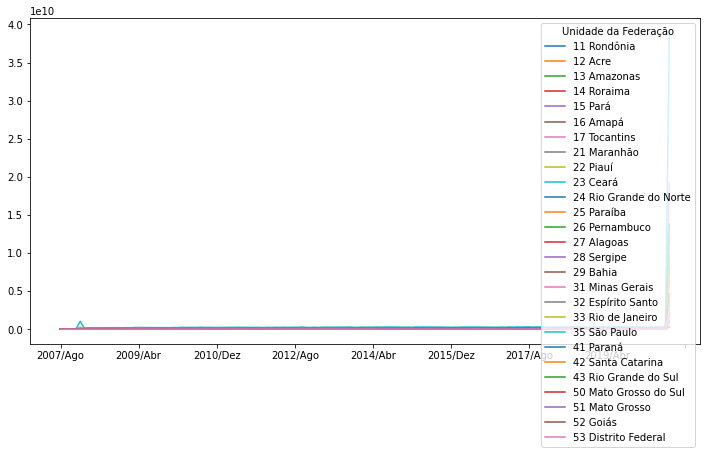

In [7]:
usaveis.T.plot(figsize=(12,6))

mas tem uma coluna que está distorcendo nosso gráfico. É a coluna de total de gastos em todos os meses, que possui um valor bem maior do que as outras. Precisamos retirá-la.

In [8]:
usaveis = usaveis.drop('Total', axis=1)

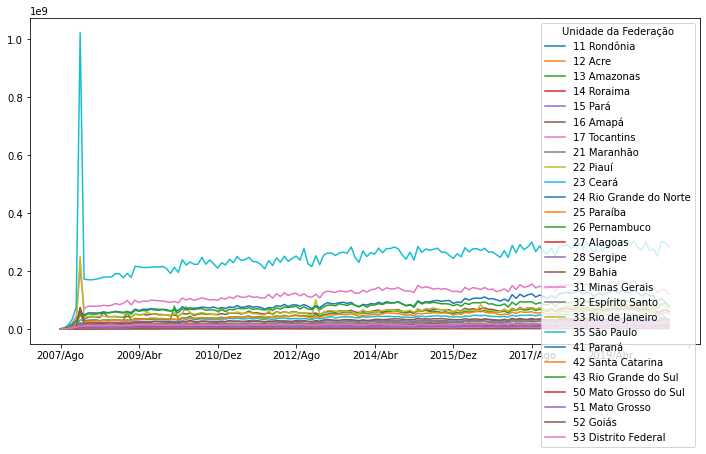

In [9]:
usaveis.T.plot(figsize=(12,6))

Ainda vemos picos bem grandes no final do ano de 2007 / início de 2008. Isso parece ter acontecido com todos os estados. Podemos conferir verificando qual é o mês com maior valor gasto entre os estados.

In [11]:
usaveis.T.idxmax()

Unidade da Federação
11 Rondônia               2018/Mai
12 Acre                   2017/Mar
13 Amazonas               2020/Mai
14 Roraima                2018/Ago
15 Pará                   2020/Mai
16 Amapá                  2020/Mai
17 Tocantins              2014/Out
21 Maranhão               2020/Mai
22 Piauí                  2019/Out
23 Ceará                  2019/Mai
24 Rio Grande do Norte    2019/Mai
25 Paraíba                2019/Mai
26 Pernambuco             2010/Jan
27 Alagoas                2014/Jan
28 Sergipe                2019/Mai
29 Bahia                  2019/Jul
31 Minas Gerais           2008/Jan
32 Espírito Santo         2019/Out
33 Rio de Janeiro         2008/Jan
35 São Paulo              2008/Jan
41 Paraná                 2019/Jul
42 Santa Catarina         2019/Jul
43 Rio Grande do Sul      2019/Jul
50 Mato Grosso do Sul     2019/Ago
51 Mato Grosso            2019/Mai
52 Goiás                  2008/Jan
53 Distrito Federal       2020/Jun
dtype: object

Nossa suposição está errada. Somente os estados de Goiás, São Paulo, Rio de Janeiro e Minas Gerais possuem os maiores valores no ano de 2008.

## Desafios

### Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada
> Para isso utilizaremos 

### Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência
> Vamos escolher os 4 estados que vimos o comportamento de pico no mês de Janeiro de 2008, além de um outro estado, Amazonas, para comparar com os outros 4.

In [12]:
# primeiro vamos tirar os índices das unidades federativas:
estados = usaveis.index.to_list()
i=0
for estado in estados:
  estados[i] = estado[3:]
  i+=1
usaveis.index = estados
usaveis.index

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object')

In [13]:
# vamos aproveitar para fazer algumas configurações de melhoria dos gráficos realizadas no notebook da aula 1:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('seaborn')

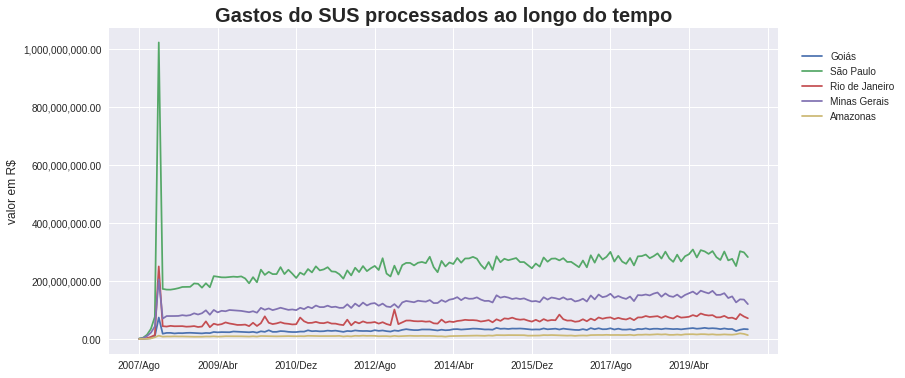

In [14]:
# agora fazendo nossa seleção de estados:
estados = ['Goiás', 'São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Amazonas']

ax = usaveis.T[estados].plot(figsize=(12,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS processados ao longo do tempo', size=20, weight='bold')
plt.ylabel('valor em R$', size=12)
plt.xlabel('')

# alterando a posição da legenda:
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2)

Não fica muito claro, porém, os valores do Amazonas, que são baixos comparados aos outros estados. Vamos fazer um plot com todos os estados, excetuando os 4 que apresentam picos.

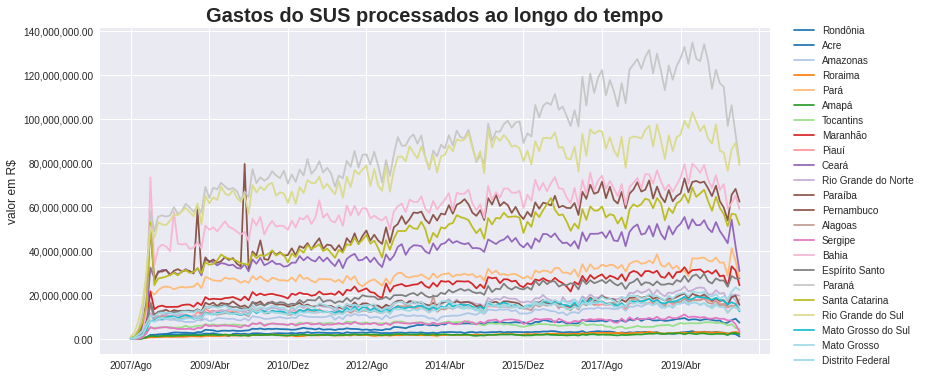

In [18]:
filtro = usaveis.index.to_list()
for estado in estados:
  if(estado != 'Amazonas'):
    filtro.remove(estado)

ax = usaveis.T[filtro].plot(figsize=(12,6), colormap='tab20')

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS processados ao longo do tempo', size=20, weight='bold')
plt.ylabel('valor em R$', size=12)
plt.xlabel('')

# alterando a posição da legenda:
plt.legend(bbox_to_anchor=(1, 1.08), loc=2, borderaxespad=2)
plt.show()

percebemos que esses outros estados também possuem um pico no final de 2007 / início de 2008, muito mais reduzido em comparação aos 4 estados (São Paulo, Rio, Goiás e Minas), mas possuem. Todos esses picos provavelmente se devem a um acúmulo de gastos registrados nesse mês, que aconteceu em todo o país, mas foi maior evidenciado nos estados de SP, RJ MG e GO.

## **O que aprendemos até aqui?**

### Fazer slice de um data frame
> Um recurso muito utilizado do pandas quando precisamos fazer análises e plotar gráficos

O impacto dos gráficos
> filtrar dados para os gráficos é algo muito importante. Dependendo dos dados que estamos utilizando, evidenciamos mais ou menos aquilo que queremos representar. 
> somente visualizando gráficos, chegamos a conclusões bem interessantes. É claro que para confirmar essas conclusões é necessário mais informações, vindas de outras fontes. Por isso a grande importância de se entender o objeto de estudo.